## About the flight delay file
This file consists of flights reaching ontime or delayed to certain destinations

## Average of distances
Read the csv file

dayweek=all the days of a week on x-axis

distance= Average of distances on y-axis


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv("C:\\Users\\mnr\\Downloads\\FlightDelays.csv")
df.head(5)


,sno,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,2,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,3,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,4,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,5,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime


OBSERVATONS:
The average of distances observed is nearly same to all the destinations


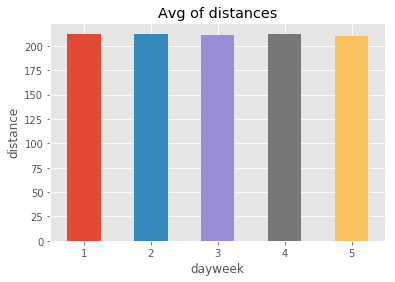

In [51]:
dfnew_A=df[(df.dayweek<6) & (df.delay== 'delayed')]
df_A=dfnew_A.groupby('dayweek')['distance'].mean()

plt.ylabel("distance")
plt.title("Avg of distances")
df_A.plot(x="dayweek",y="distance",kind="bar")
plt.style.use('ggplot')
plt.xticks(rotation=360)
print("OBSERVATONS:")
print("The average of distances observed is nearly same to all the destinations")
plt.style.use('ggplot')
plt.show()



## Sum of distances
dayweek=all the days of a week on x-axis

distance=sum of distances on y-axis

OBSERVATIONS:
The maximum sum of distances is covered on first day of the week


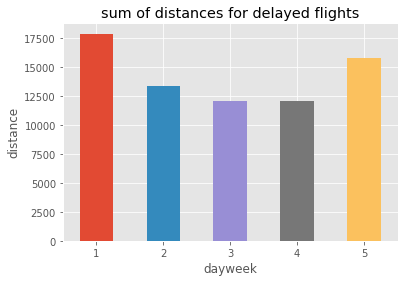

In [4]:
dfnew_S=df[(df.dayweek<6) & (df.delay== 'delayed')]
df_S=dfnew_S.groupby('dayweek')['distance'].sum()

plt.ylabel("distance")
plt.title("sum of distances for delayed flights")
df_S.plot(x="dayweek",y="distance",kind="bar")
plt.style.use('ggplot')
plt.xticks(rotation=360)
print("OBSERVATIONS:")
print("The maximum sum of distances is covered on first day of the week")
plt.show()

## Count of distances
dayweek=all the days of a week on x-axis

distance=count of distance on y-axis

OBSERVATIONS:
Maximum number of flights are observed on first day of week
Equal number of flights are observed on third and fourth days of the week 


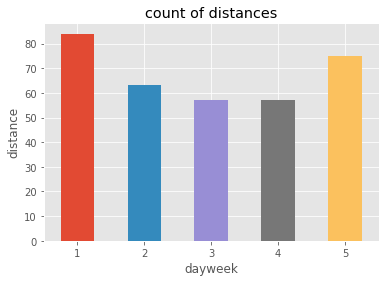

In [5]:
dfnew_C=df[(df.dayweek<6) & (df.delay== 'delayed')]
df_C=dfnew_C.groupby('dayweek')['distance'].count()
plt.ylabel("distance")
plt.title("count of distances")
df_C.plot(x="dayweek",y="distance",kind="bar")
plt.style.use('ggplot')
plt.xticks(rotation=360)
print("OBSERVATIONS:")
print("Maximum number of flights are observed on first day of week")
print("Equal number of flights are observed on third and fourth days of the week ")
plt.show()

## No. of flights delayed and reaching ontime

OBSERVATIONS:
Number of flights delayed are 428 
Number of flights ontime are 1773


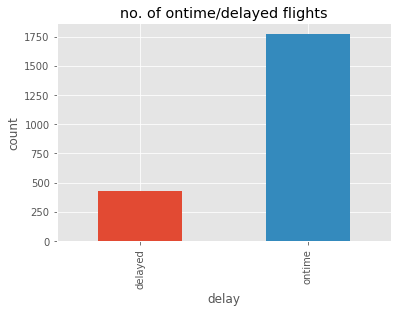

In [34]:
df_T=df.groupby('delay')['distance'].count()
#df_T=df_T.reset_index()
#print(df_T)
df_T.plot.bar()
plt.title('no. of ontime/delayed flights')
plt.ylabel('count')
print("OBSERVATIONS:")
print("Number of flights delayed are 428 ")
print("Number of flights ontime are 1773")
plt.show()

## Distance Vs Dayweek
dayweek=all the days of a week on x-axis

distance=count of distance covered by flights on y-axis 


OBSERVATIONS:
Maximum distance covered by the ONTIME flights is on 5th day of the week
Maximum distance covered by the DELAYED flights is on 1st day of the week 


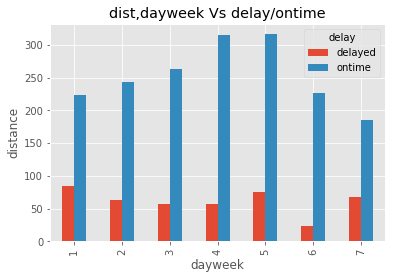

In [10]:
df.groupby(['dayweek','delay'])['distance'].count().unstack().plot.bar()
plt.ylabel('distance')
plt.title('dist,dayweek Vs delay/ontime')
print("OBSERVATIONS:")
print("Maximum distance covered by the ONTIME flights is on 5th day of the week")
print("Maximum distance covered by the DELAYED flights is on 1st day of the week ")

## % of distance covered on each day
dayweek= all the days of a week on x-axis

percentage= % of distance on y-axis

OBSERVATIONS:
Maximum % of distance covered by DELAYED flights is on 1st day of the week
Maximum % of distance covered by ONTIME flights is on 6th day of the week 


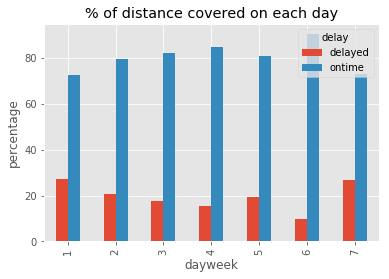

In [36]:
df.groupby(['dayweek','delay'])['distance'].count()
df_P=df.groupby(['dayweek','delay'])['distance'].count()
df_P1=df_P.reset_index()
df_P1

df_P2=df.groupby('dayweek')['carrier'].count()
df_P2=df_P2.reset_index()
df_PNEW=pd.merge(df_P1,df_P2,how='inner')
df_PNEW

df_PNEW['percentage']=100*df_PNEW['distance']/df_PNEW['carrier']
df_PN=df_PNEW['percentage'].reset_index()
df_P4=pd.merge(df_PNEW,df_PN,how='inner')
#print(df_P4)

df_P4.groupby(['dayweek','delay'])['percentage'].sum().unstack().plot.bar()
plt.title('% of distance covered on each day')
plt.ylabel('percentage')
print("OBSERVATIONS:")
print("Maximum % of distance covered by DELAYED flights is on 1st day of the week")
print("Maximum % of distance covered by ONTIME flights is on 6th day of the week ")

## Plots on Avg of Distances
### Avg of dist Vs ontime/delay

OBSERVATIONS:
Average of distance covered by ontime and delayed flights is approximately the same


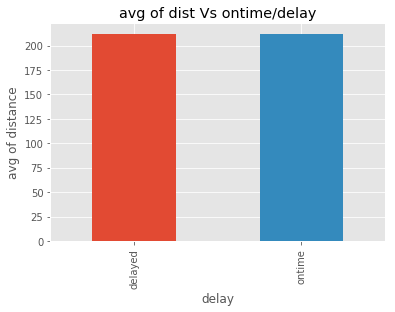

In [37]:
dfnew=df.groupby(['schedtime','deptime','weather'])['delay'].count()
dfnew=dfnew.reset_index()
dfnew.head()
df_A=df.groupby('delay')['distance'].mean()
#print(df_A)
df_A.plot(x='delay',y='distance',kind='bar',title='avg of dist Vs ontime/delay')
plt.style.use('ggplot')
plt.ylabel("avg of distance")
print("OBSERVATIONS:")
print("Average of distance covered by ontime and delayed flights is approximately the same")

## Avg of dist Vs No. of carrier flights reaching ontime/delay

OBSERVATIONS:
Average of distance covered by delayed and ontime flights is same 


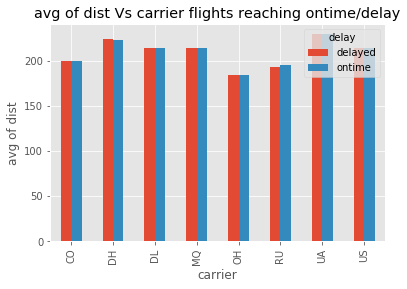

In [38]:
df.groupby(['carrier','delay'])['distance'].mean().unstack().plot.bar()
plt.style.use('ggplot')
plt.ylabel('avg of dist')
plt.title('avg of dist Vs carrier flights reaching ontime/delay')
print("OBSERVATIONS:")
print("Average of distance covered by delayed and ontime flights is same ")

## Avg of dist Vs Flights from Origin

OBSERVATIONS:
The average distance covered by the on-time/delayed flights from origin is observed to be same.


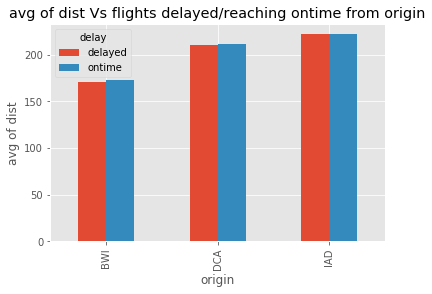

In [39]:
df.groupby(['origin','delay'])['distance'].mean().unstack().plot.bar()
plt.style.use('ggplot')
plt.ylabel('avg of dist')
plt.title('avg of dist Vs flights delayed/reaching ontime from origin')
print("OBSERVATIONS:")
print("The average distance covered by the on-time/delayed flights from origin is observed to be same.")

## Avg of Dist Vs flights to dest

OBSERVATIONS:
The average distance covered by the on-time/delayed flights to dest is observed to be same.


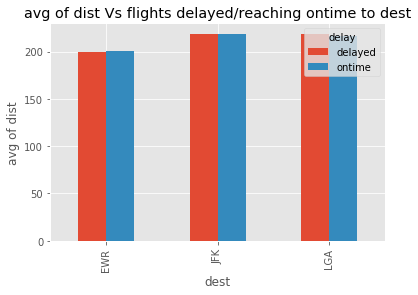

In [41]:
df.groupby(['dest','delay'])['distance'].mean().unstack().plot.bar()
plt.style.use('ggplot')
plt.ylabel('avg of dist')
plt.title('avg of dist Vs flights delayed/reaching ontime to dest')
print("OBSERVATIONS:")
print("The average distance covered by the on-time/delayed flights to dest is observed to be same.")


## Avg of Dist Vs Origin,Dest 

OBSERVATIONS:
The average distance covered by the on-time/delayed flights from origin to dest is observed to be same.
From all these observations, we can say that, Distance has no effect on the flights reaching on-time or delayed


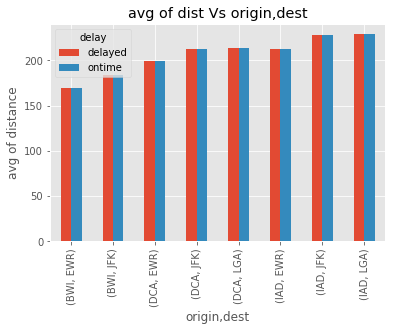

In [45]:
df.groupby(['origin','dest','delay'])['distance'].mean().unstack().plot.bar()
plt.style.use('ggplot')
plt.ylabel('avg of distance')
plt.title('avg of dist Vs origin,dest')
print("OBSERVATIONS:")
print("The average distance covered by the on-time/delayed flights from origin to dest is observed to be same.")
print("From all these observations, we can say that, Distance has no effect on the flights reaching on-time or delayed")

## Dayweek Vs Delay/ontime
dayweek=all the days of a week on x-axis

delay=count of flights on y-axis

OBSERVATIONS:
Maximum number of  flights DELAYED are observed on the 1st day of the week
Maximum number of flights reaching ONTIME are observed on 5th day of the week


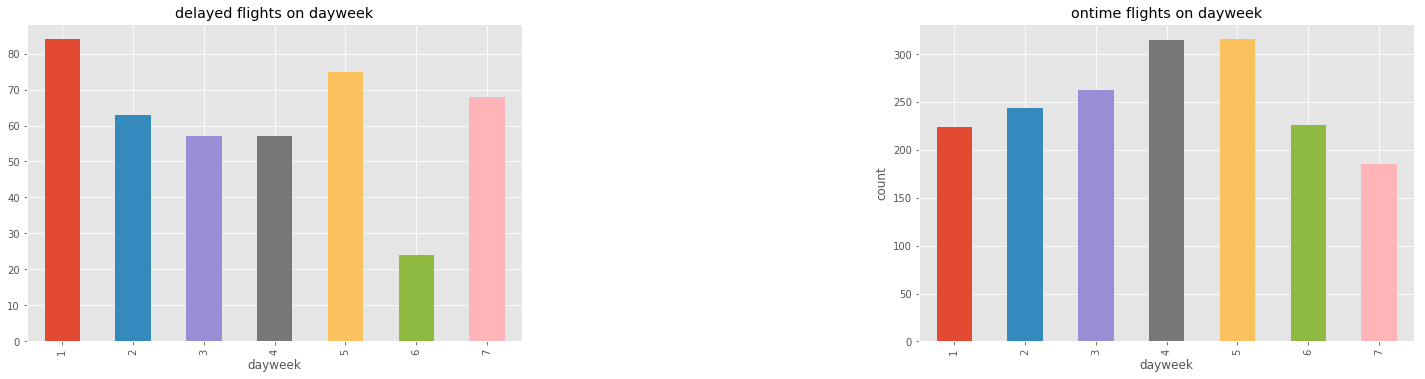

In [8]:
df_c=df[(df.delay=='delayed')]
df_c1=df_c.groupby('dayweek')['delay'].count()

df_Do=df[(df.delay=='ontime')]
df_Do1=df_Do.groupby('dayweek')['delay'].count()
#plot the graph
fig,ax=plt.subplots(1,2,figsize=(20,5))
plt.tight_layout()
df_c1.plot(x="dayweek",y='delay',kind='bar',ax=ax[0],title='delayed flights on dayweek')
plt.style.use('ggplot')
df_Do1.plot(x="dayweek",y='delay',kind='bar',ax=ax[1],title="ontime flights on dayweek")
plt.ylabel("count")
fig.subplots_adjust(wspace=0.8)
print("OBSERVATIONS:")
print("Maximum number of  flights DELAYED are observed on the 1st day of the week")
print("Maximum number of flights reaching ONTIME are observed on 5th day of the week")

## Daymonth Vs Delay/Ontime
daymonth= all the days of a monthon x-axis

delay=count of flights on y-axis

OBSERVATIONS:
No flights are DEALYED on 1st day of the month
Maximum number of flights DELAYED are observed on 26th of the month 
Maximum number of flights ONTIME are observed on 20th of the month 


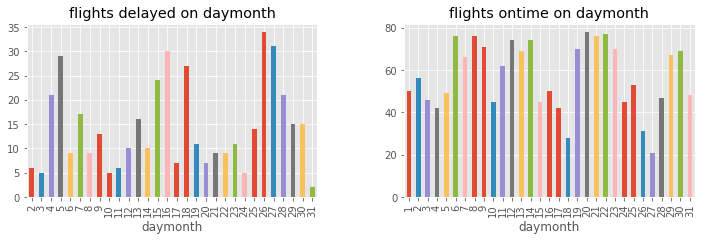

In [10]:
df_md=df[(df.delay=='delayed')]
df_md1=df_md.groupby('daymonth')['delay'].count()


df_mo=df[(df.delay=='ontime')]
df_mo1=df_mo.groupby('daymonth')['delay'].count()
#plot the graph
fig,ax=plt.subplots(1,2,figsize=(10,3))
plt.tight_layout()
df_md1.plot(x="daymonth",y='delay',kind='bar',ax=ax[0],title="flights delayed on daymonth")
plt.style.use('ggplot')
df_mo1.plot(x="daymonth",y='delay',kind='bar',ax=ax[1],title="flights ontime on daymonth")
#plt.ylabel("count")
fig.subplots_adjust(wspace=0.3)
print("OBSERVATIONS:")
print("No flights are DEALYED on 1st day of the month")
print("Maximum number of flights DELAYED are observed on 26th of the month ")
print("Maximum number of flights ONTIME are observed on 20th of the month ")

## Date Vs delay/ontime
date= dates of january on x-axis

delay=count of flights

OBSERAVTIONS:
Minimum number of flights DELAYED are observed on 1/31/2004 
Minimum number of flights reaching ONTIME are observed on 1/26/2004


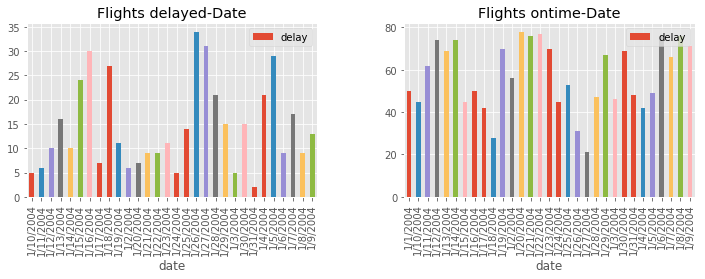

In [11]:
df_date=df[(df.delay=='delayed')]
df_date1=df_date.groupby('date')['delay'].count()
df_date2=df_date1.reset_index()
df_date2
df_dtO=df[(df.delay=='ontime')]
df_dtO1=df_dtO.groupby('date')['delay'].count()
df_dtO2=df_dtO1.reset_index()
#plot the graph
fig,ax=plt.subplots(1,2,figsize=(10,3))
plt.tight_layout()
df_date2.plot(x='date',y='delay',kind='bar',title='Flights delayed-Date',ax=ax[0])
plt.style.use('ggplot')
df_dtO2.plot(x='date',y='delay',kind='bar',title='Flights ontime-Date',ax=ax[1])
#plt.ylabel("count")
fig.subplots_adjust(wspace=0.3)
print("OBSERAVTIONS:")
print("Minimum number of flights DELAYED are observed on 1/31/2004 ")
print("Minimum number of flights reaching ONTIME are observed on 1/26/2004")

## Number of flights Vs ontime/delay 
Filter the delay column

dayweek=all the  days of a week on x-axis

carrier=count of the number of flights on y-axis

plot the graphs for delayed and ontime flights

OBSERVATIONS:
Maximum number of flights DELAYED are observed on first day of the week
minimum number of flights DELAYED are observed on sixth day of the week 
maximum number of flights reaching ONTIME are observed on 5th day of the week
Minimum number of flights reaching ONTIME are observed on 7th day of the week


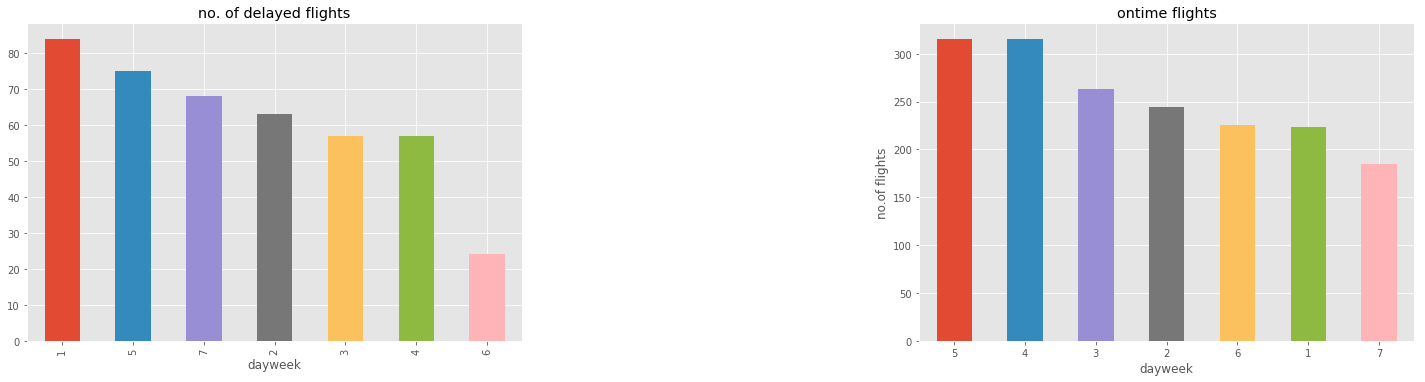

In [10]:
dfnew1=df[(df.delay== 'delayed')]
dfnew2=dfnew1[['dayweek','delay','carrier']]
dfnew3=dfnew2.groupby(['dayweek','delay']).count()
dfnew3=dfnew3.reset_index()

df_day=df[ (df.delay== 'ontime')]
df_day1=df_day[['dayweek','delay','carrier']]
df_day2=df_day1.groupby(['dayweek','delay']).count()
df_day2=df_day2.reset_index()
#plot the graph
fig,ax=plt.subplots(1,2,figsize=(20,5))
plt.tight_layout()
#graph 1
dfnew3.sort_values('carrier',ascending=False).plot(x="dayweek",y="carrier",kind="bar",ax=ax[0],legend=False,title="no. of delayed flights")
plt.style.use('ggplot')
plt.ylabel("carrier")
plt.xticks(rotation=360)

#graph 2
df_day2.sort_values('carrier',ascending=False).plot(x="dayweek",y="carrier",kind="bar",ax=ax[1],legend=False)
plt.xticks(rotation=360)
plt.ylabel("no.of flights")
plt.title("ontime flights")
fig.subplots_adjust(wspace=0.8)
print("OBSERVATIONS:")
print("Maximum number of flights DELAYED are observed on first day of the week")
print("minimum number of flights DELAYED are observed on sixth day of the week ")
print("maximum number of flights reaching ONTIME are observed on 5th day of the week")
print("Minimum number of flights reaching ONTIME are observed on 7th day of the week")

## PLOTS ON WEATHER
###  Good/Bad weather Vs weekdays
Filter the weather column

dayweek=all the days of a week onn x-axis

weather=count of good/bad weather on y-axis



OBSERVATIONS:
Bad weather was observed on 4 days of the week 
The maximum count of bad weather was observed on 2nd day of the week
The maximum count of good weather was observed on 5th day of the week


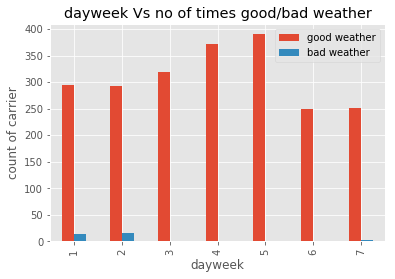

In [13]:
df.groupby(['dayweek','weather'])['carrier'].count().unstack().plot.bar()
plt.ylabel('count of carrier')
plt.title('dayweek Vs no of times good/bad weather')
plt.style.use('ggplot')
L=plt.legend()
L.get_texts()[0].set_text('good weather')
L.get_texts()[1].set_text('bad weather')

print('OBSERVATIONS:')
print("Bad weather was observed on 4 days of the week ")
print("The maximum count of bad weather was observed on 2nd day of the week")
print("The maximum count of good weather was observed on 5th day of the week")


## Flights ontime/delayed Vs Good Weather
Filter the weather  column

dayweek=all the days of a weeek on x-axis

count=count of flights on y-axis

OBSERVATIONS:
On a good weather day,maximum no. of flights delayed are observed on 1st day of the week 
On a good weather day,maximum no. of flights reaching ontime are observed on 5th day of the week 


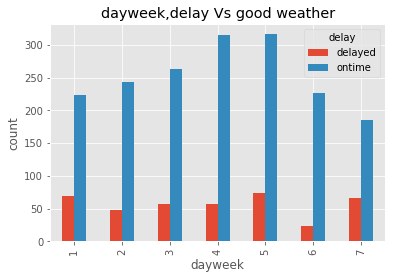

In [43]:

df_W1=df[(df.weather==0)]
df_W1.groupby(["dayweek","delay"])['weather'].count().unstack().plot.bar()
plt.ylabel('count')
plt.title('dayweek,delay Vs good weather')
print("OBSERVATIONS:")
print("On a good weather day,maximum no. of flights delayed are observed on 1st day of the week ")
print("On a good weather day,maximum no. of flights reaching ontime are observed on 5th day of the week ")

## Flights ontime/delayed Vs Bad Weather
Filter  weather column

dayweek=all the days of a week on x-axis

count=count of flights on y-axis


OBSERVATIONS:
All the flights are delayed on a bad weather day


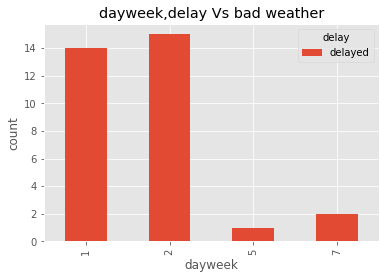

In [44]:
df_W1=df[(df.weather==1)]
df_W1.groupby(["dayweek","delay"])['weather'].count().unstack().plot.bar()
plt.ylabel('count')
plt.title('dayweek,delay Vs bad weather')
print("OBSERVATIONS:")
print("All the flights are delayed on a bad weather day")

## PLOTS ON DESTINATION
### Number of flights Vs Destination
dest=different places on x-axis

carrier=count of flights on y-axis

OBSERVATIONS
The maximum number of flights are observed to the destination of LGA


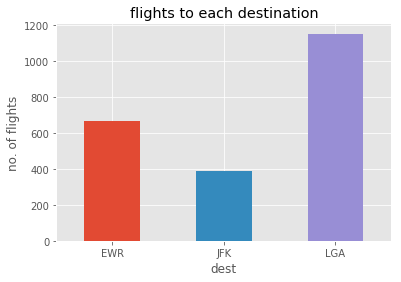

In [14]:
df_de=df[['dest','carrier']]
df_de1=df_de.groupby('dest')['carrier'].count()
df_de1.plot(x="dest",y="carrier",kind="bar")
plt.style.use('ggplot')
plt.xticks(rotation=360)
plt.ylabel("no. of flights")
plt.title("flights to each destination")
print("OBSERVATIONS")
print("The maximum number of flights are observed to the destination of LGA")

## Dest,Dayweek Vs No. of flights

dest,dayweek=destination and all days of a week on x-axis

carrier= count of flights

OBSERVATIONS
The maximum number of flights are observed to the destination of LGA on 5th day of the week


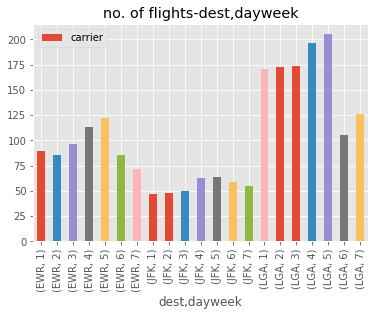

In [15]:
df_de=df[['dest','dayweek','carrier']]
df_de1=df_de.groupby(['dest','dayweek'])['carrier'].count()
df_de1
df_de1=df_de1.reset_index()
df_de1.plot(x=["dest","dayweek"],y="carrier",kind="bar",title="no. of flights-dest,dayweek")
plt.style.use('ggplot')
print("OBSERVATIONS")
print("The maximum number of flights are observed to the destination of LGA on 5th day of the week")

## Origin,Dest Vs Delay/Ontime flights 

origin,dest=different places on x-axis

 delay=count of flights on y-axis

OBSERVATIONS:
Maximum no. of delayed flights are observed from DCA to LGA 
Minimum number of delayed flights are observed from BWI to JFK
Maximum no. of flights reaching ontime are observed from DCA to LGA
Minimum number of flights reaching ontime are from BWI to JFK


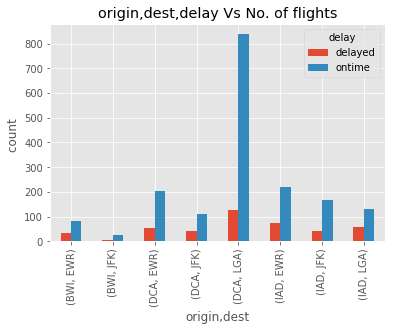

In [49]:

df.groupby(['origin','dest','delay'])['carrier'].count().unstack().plot.bar()
plt.ylabel('count ')
plt.title('origin,dest,delay Vs No. of flights')
print("OBSERVATIONS:")
print("Maximum no. of delayed flights are observed from DCA to LGA ")
print("Minimum number of delayed flights are observed from BWI to JFK")
print("Maximum no. of flights reaching ontime are observed from DCA to LGA")
print("Minimum number of flights reaching ontime are from BWI to JFK")

## Origin,dest   Vs   %( Delay/ontime)
Filter the delay column

origin,dest=origin and destination places on x-axis

percentage=percentage of flights delayed/ontime on y-axis

OBSERVATIONS:
Maximum percentage of DELAY is observed from IAD to LGA
Minimum percentage of DELAY is observed from DCA to LGA
Maximum percentage of ONTIME flights are observed from DCA to LGA
Minimum percentage of ONTIME flights are observed from IAD to LGA


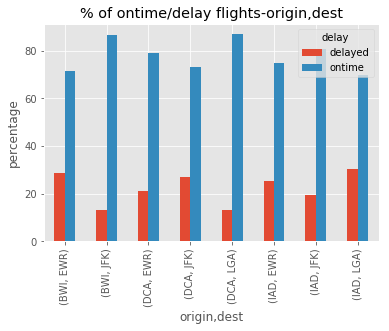

In [23]:
df1=df.groupby(["origin","dest"])["distance"].count()
df1=df1.reset_index()
#print(df1)



#df_ODD=df[(df.delay=='delayed')]
df_ODD1=df[['dest','origin','delay','carrier']]
#print(df_ODD1)
df_ODD2=df_ODD1.groupby(['delay','origin','dest']).count()
df_ODD2=df_ODD2.reset_index()
dfnew2=pd.merge(df1,df_ODD2,how='inner')
dfnew2=dfnew2.reset_index()
#print(dfnew2)




dfnew2['percentage']=100*dfnew2['carrier']/dfnew2['distance']
df_ODD3=dfnew2['percentage'].reset_index()
dfnew3=pd.merge(dfnew2,df_ODD3,how='inner')
#print(dfnew3)

dfnew3.groupby(['origin','dest','delay'])['percentage'].sum().unstack().plot.bar()
plt.title('% of ontime/delay flights-origin,dest')
plt.ylabel('percentage')

print("OBSERVATIONS:")
print("Maximum percentage of DELAY is observed from IAD to LGA")
print("Minimum percentage of DELAY is observed from DCA to LGA")
print("Maximum percentage of ONTIME flights are observed from DCA to LGA")
print("Minimum percentage of ONTIME flights are observed from IAD to LGA")


## Carrier Vs No. of flights

OBSERVATIONS:
Maximum number of ontime flights are of DH carrier 
Minimum number of ontime flights are of UA carrier
Maximum number of Delayed flights are of DH carrier
Minimum number of Delayed flihts are of OH carrier 


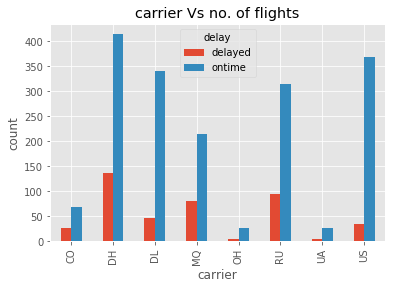

In [50]:
df.groupby(['carrier','delay'])['distance'].count().unstack().plot.bar()
plt.ylabel('count')
plt.title('carrier Vs no. of flights')
plt.style.use('ggplot')
print("OBSERVATIONS:")
print("Maximum number of ontime flights are of DH carrier ")
print("Minimum number of ontime flights are of UA carrier")
print("Maximum number of Delayed flights are of DH carrier")
print("Minimum number of Delayed flihts are of OH carrier ")

## Carrier Vs Delay/ontime
carrier=different carrier flights on x-axis

count=count of flights on y-axis

OBSERVATIONS:
Maximum number of ontime carrier flights are observed in DH
Second maximum are observed in RU
Maximum number of delayed carrier flights are observed in DH 
Second maximum are observed in US


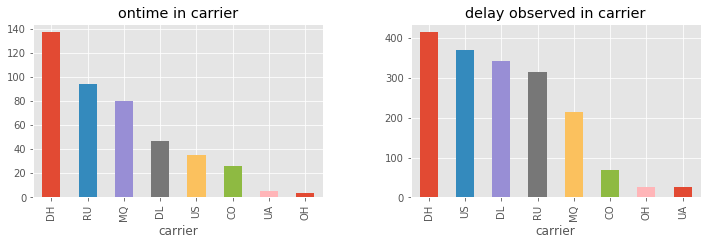

In [8]:
df_cd1=df[(df.delay== 'delayed')]
df_cd2=df_cd1[['delay','carrier']]
df_cd3=df_cd2.groupby('carrier')['delay'].count()
df_cd3=df_cd3.reset_index()
df_cd3
df_co1=df[(df.delay== 'ontime')]
df_co2=df_co1[['delay','carrier']]
df_co3=df_co2.groupby('carrier')['delay'].count()
df_co3=df_co3.reset_index()
#plot the graph
fig,ax=plt.subplots(1,2,figsize=(10,3))
plt.tight_layout()
df_cd3.sort_values('delay',ascending=False).plot(x="carrier",y="delay",kind="bar",legend=False,title="ontime in carrier",ax=ax[0])
#plt.ylabel("count")
#plt.xticks(rotation=360)
#plt.title("ontime  in carrier ")
plt.style.use('ggplot')
df_co3.sort_values('delay',ascending=False).plot(x="carrier",y="delay",kind="bar",legend=False,ax=ax[1],title='delay observed in carrier')
#plt.ylabel("count")
#plt.xticks(rotation=360)
#plt.title("delay observed in carrier ")
fig.subplots_adjust(wspace=0.3)
print("OBSERVATIONS:")
print("Maximum number of ontime carrier flights are observed in DH")
print("Second maximum are observed in RU")
print("Maximum number of delayed carrier flights are observed in DH ")
print("Second maximum are observed in US")

## Carrier Vs %(delay/ontime)
Filter the delay column

carrier=different carrier flights on x-axis

count=count of flights on y-axis

OBSERVATIONS:
Maximum % of DELAYED carrier flights are observed in DH
Minimum % of DELAYED carrier flights are observed in OH 
Maximum % of ONTIME carrier flights are observed in DH
Minimum % of ONTIME carrier flights are observed in UA


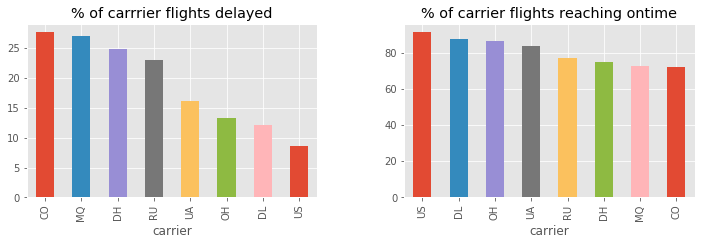

In [7]:
df1=df.groupby("carrier")["distance"].count()
df1=df1.reset_index()
#df1
dfnew=df[(df.delay=='delayed')]
dfnew1=dfnew.groupby('carrier')['delay'].count()
dfnew1=dfnew1.reset_index()
dfnew2=pd.merge(df1,dfnew1,how='inner')
dfnew2=dfnew2.reset_index()
dfnew1['percentage']=100*dfnew2['delay']/dfnew2['distance']
dfnew4=dfnew1['percentage'].reset_index()
dfnew5=pd.merge(dfnew2,dfnew4,how='inner')
df_O=df[(df.delay=='ontime')]
df_O1=df_O.groupby('carrier')['delay'].count()
df_O1=df_O1.reset_index()
df_O2=pd.merge(df1,df_O1,how='inner')
df_O2=df_O2.reset_index()
df_O1['percentage']=100*df_O2['delay']/df_O2['distance']
df_ONEW=df_O1['percentage'].reset_index()
df_O5=pd.merge(df_O2,df_ONEW,how='inner')
#plot the graph
fig,ax=plt.subplots(1,2,figsize=(10,3))
plt.tight_layout()
plt.ylabel="count"
dfnew5.sort_values('percentage',ascending=False).plot(x="carrier",y="percentage",kind="bar",legend=False,ax=ax[0],title="% of carrrier flights delayed")
plt.style.use('ggplot')
df_O5.sort_values('percentage',ascending=False).plot(x="carrier",y="percentage",kind="bar",ax=ax[1],legend=False,title="% of carrier flights reaching ontime")
#plt.ylabel("count")
#ax.set_ylabel('count')
fig.subplots_adjust(wspace=0.3)
print("OBSERVATIONS:")
print("Maximum % of DELAYED carrier flights are observed in DH")
print("Minimum % of DELAYED carrier flights are observed in OH ")
print("Maximum % of ONTIME carrier flights are observed in DH")
print("Minimum % of ONTIME carrier flights are observed in UA")